In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import Pool
import math

import os
import time
import sys

In [2]:
pic_1 = np.empty((3,3,3))
pic_1[:,:] = [1,0,0]
pic_1[0,0] = [0,1,1]

pic_2 = np.empty((3,3,3))
pic_2[:,:] = [1,0,0]
pic_2[1,1] = [1,1,1]

pic_3 = np.empty((3,3,3))
pic_3[:,:] = [1,0,0]
pic_3[2,2] = [1,0,1]

pics = [pic_1, pic_2, pic_3]

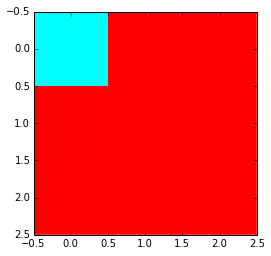

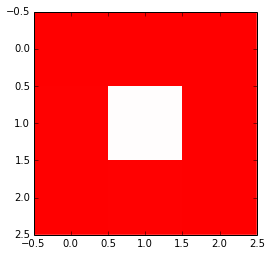

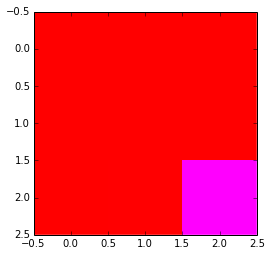

In [3]:
for pic in pics:
    plt.imshow(pic, interpolation='none')
    plt.figure()

In [ ]:
# def maxDist(pixels):
#     furthest = (-1, pixels[0])
#     calDist = lambda x, y: np.sum([(x[i] - y[i])**2 for i in xrange(len(x))])
#     for i, pixel in enumerate(pixels):
#         acc = 0
#         for others in pixels:
#             acc += calDist(pixel, others)
#         if acc > furthest[0]:
#             furthest = (acc, pixel)    
#     return furthest[1]

# def merge(pics):
#     w, h, d = pics[0].shape
#     pic_m = np.zeros(pics[0].shape)
#     p = Pool(4)
#     for i in xrange(w):
#         pic_m[i,:] = p.map(maxDist, [[pic[i,j] for pic in pics] for j in xrange(h)])
#     return pic_m

In [44]:
def maxDist(pixels):
    furthest = (-1, pixels[0])
    th = .04
    calDist = lambda x, y: np.sum([(x[i] - y[i])**2 for i in xrange(len(x))])
    for i, pixel in enumerate(pixels):
        acc = 0
        for others in pixels:
            acc += calDist(pixel, others)
        if acc > furthest[0] and acc > th:
            furthest = (acc, pixel)
            
    return furthest[1], furthest[0]       
#     return furthest[1]

def merge(pics):
    w, h, d = pics[0].shape
    pic_m = np.zeros(pics[0].shape)
    p = Pool(4)
    lst = []
    for i in xrange(w):
        res = np.array(p.map(maxDist, [[pic[i,j] for pic in pics] for j in xrange(h)]))

        for j in xrange(h):
            pic_m[i,j] = res[j, 0]
        lst += [res[i, 1] for i in xrange(h)]
    return pic_m, lst

In [5]:
start_time = time.time()
pic_m, lst = merge(pics)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0274319648743 seconds ---


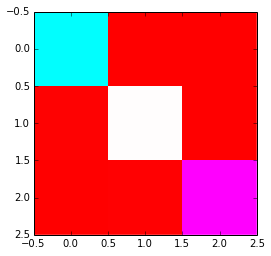

In [6]:
plt.imshow(pic_m, interpolation='none')
plt.figure()

In [ ]:
plt.hist(lst, bins=10);

In [7]:
def readImg(name):
    return plt.imread('/Users/SamX/Desktop/NumMeth/CantSleep/' + name)

pic1 = readImg('pic_1.png')
pic2 = readImg('pic_2.png')
pic3 = readImg('pic_3.png')
pics=[pic1,pic2,pic3]

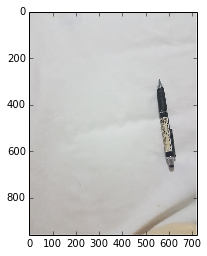

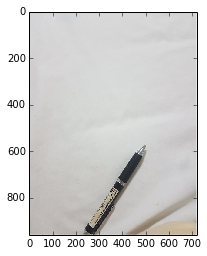

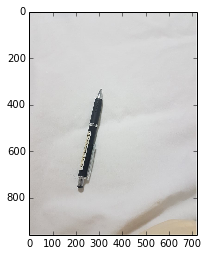

In [8]:
for pic in pics:
    plt.imshow(pic, interpolation='none')
    plt.figure()

In [45]:
start_time = time.time()
pic_m, lst = merge(pics)
print("--- %s seconds ---" % (time.time() - start_time))

--- 109.167965174 seconds ---


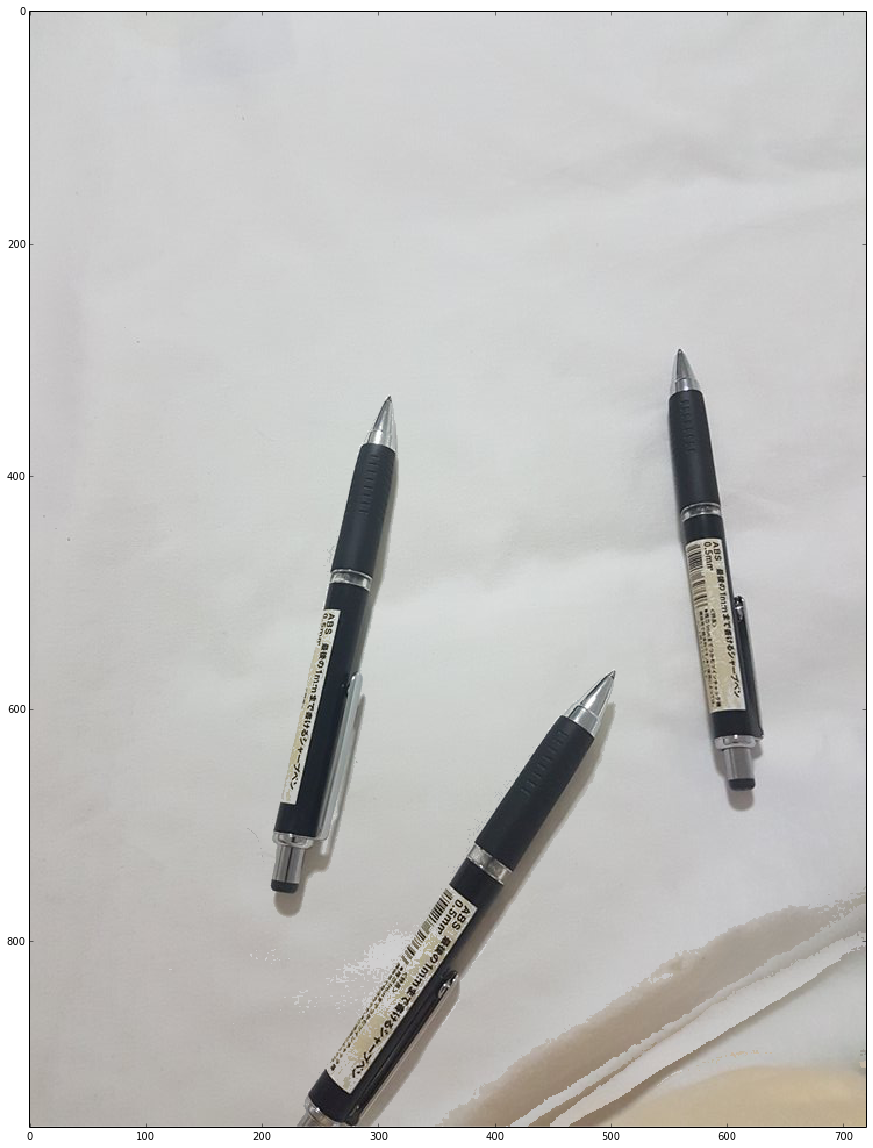

In [46]:
plt.figure(figsize=(20,20))
plt.imshow(pic_m, interpolation='none')
plt.savefig("merge")

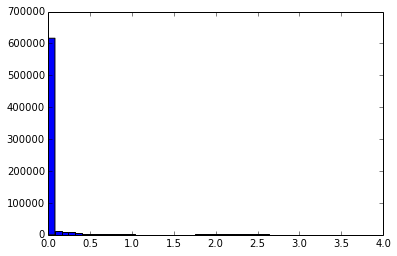

In [40]:
plt.hist(lst, bins=50);

In [12]:
np.mean(lst)

0.1196062699316036

In [15]:
lst

[0.0062591303572752111,
 0.0048442900799550159,
 0.0062591303572752111,
 0.0062591303572752111,
 0.0080430594025919788,
 0.0080430594025919788,
 0.0080430594025919788,
 0.0071049587839340234,
 0.011410994410560704,
 0.0062591303572752111,
 0.0055055741226155419,
 0.0078585150185936925,
 0.0098269884479087466,
 0.0073817753599314528,
 0.0050288344639533022,
 0.0042752782292936331,
 0.0081199528959245981,
 0.006489810837273069,
 0.0050442131626198261,
 0.0057054972052803521,
 0.0057054972052803521,
 0.0089657813225834104,
 0.0072433670719327381,
 0.0064590534399400212,
 0.016839675039843627,
 0.019423296415819635,
 0.014440598047865905,
 0.008350633375922456,
 0.0092272191999143161,
 0.015594000447855194,
 0.013287195647876615,
 0.007474047551930596,
 0.0075663197439297392,
 0.008350633375922456,
 0.008350633375922456,
 0.010380621599903606,
 0.011534023999892895,
 0.011534023999892895,
 0.0075663197439297392,
 0.004613609599957158,
 0.007474047551930596,
 0.007474047551930596,
 0.006689

In [41]:
new_lst = []
for e in lst:
    if e < 1.5:
        new_lst += [e]

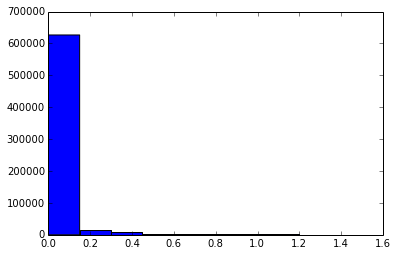

In [43]:
plt.hist(new_lst, bins=10);